In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Import my code

In [2]:
import sys
sys.path.insert(0,'..')

from boltzmann_generator import BoltzmannGenerator
import energy_models.bivariate_normal_distribution as bivariate_normal

In [3]:
bivariate_normal_model = bivariate_normal.BivariateNormalDistribution()

Used params:
sigma_x: 3 sigma_y: 2 rho: 0.9 

Covariance matrix of the distribution:
[[9.  5.4]
 [5.4 4. ]]


# Sample training set

In [4]:
def plot_distribution(samples):
    x = samples[:, 0]
    y = samples[:, 1]
    plt.figure(figsize=[8, 6])
    plt.hist2d(x, y, 
               bins=(100, 100),
               range=[[-10, 10], [-7.5, 7.5]],
               cmap=plt.cm.jet)
    plt.show()

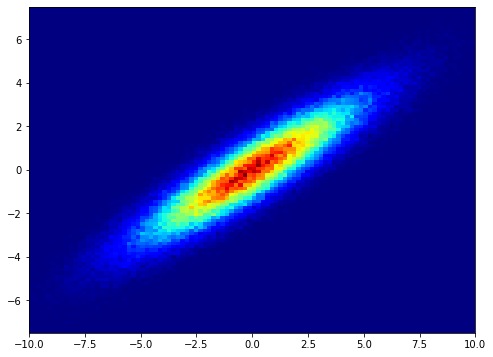

In [5]:
size_of_training_set = 200000
training_dataset = bivariate_normal_model.produce_train_dataset(size_of_training_set)
plot_distribution(training_dataset)

# Create and train Boltzmann generator

In [6]:
bg = BoltzmannGenerator(
    layers='R'*2, 
    energy_model=bivariate_normal_model,
)

Layers of invertible NN: <RR>
< 2 0 0
R 1 1 0
R 1 1 0
> 1 1 0


In [7]:
                   # w_ML, w_KL, iter, b_size, lr
training_shedule = [[1,   0, 30,  500,  1e-3],
                    [1,   1, 100, 1000, 1e-3]]

Should I continue in training? (press Enter)
Iteration 0/30: loss: 6.6065 ML_loss: 6.6065 
Iteration 10/30: loss: 4.0409 ML_loss: 4.0409 
Iteration 20/30: loss: 4.0349 ML_loss: 4.0349 


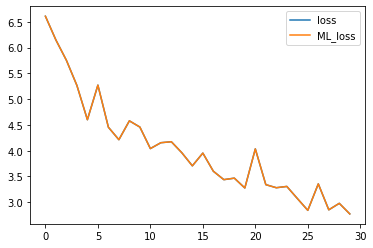

Should I continue in training? (press Enter)
Iteration 0/100: loss: 3.1665 ML_loss: 2.8006 KL_loss: 0.3659 
Iteration 10/100: loss: 2.6995 ML_loss: 2.4294 KL_loss: 0.2701 
Iteration 20/100: loss: 2.4933 ML_loss: 2.2972 KL_loss: 0.1961 
Iteration 30/100: loss: 2.1789 ML_loss: 2.0486 KL_loss: 0.1304 
Iteration 40/100: loss: 2.2200 ML_loss: 2.0933 KL_loss: 0.1266 
Iteration 50/100: loss: 2.0354 ML_loss: 1.9757 KL_loss: 0.0597 
Iteration 60/100: loss: 2.0906 ML_loss: 1.9995 KL_loss: 0.0911 
Iteration 70/100: loss: 1.9858 ML_loss: 1.9805 KL_loss: 0.0053 
Iteration 80/100: loss: 2.0058 ML_loss: 2.0021 KL_loss: 0.0037 
Iteration 90/100: loss: 1.9270 ML_loss: 1.9509 KL_loss: -0.0239 


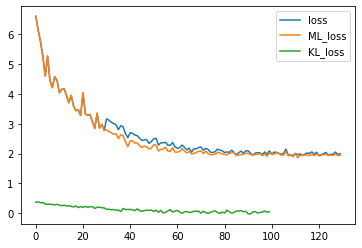

In [8]:
loss_vals = {"loss": np.array([]), "ML_loss": np.array([]), "KL_loss": np.array([])}

for training_variables in training_shedule:
    input("Should I continue in training? (press Enter)")
    current_loss_vals = bg.train(training_dataset, 
                                 weight_ML = training_variables[0],
                                 weight_KL = training_variables[1],
                                 iterations = training_variables[2],
                                 batch_size = training_variables[3],
                                 lr = training_variables[4])
    
    for loss_name in current_loss_vals:
        loss_vals[loss_name] = np.append(loss_vals[loss_name], current_loss_vals[loss_name])
        
        plt.plot(loss_vals[loss_name], label=loss_name)
        
    plt.legend(loc='upper right')
    plt.show()

# Validate results

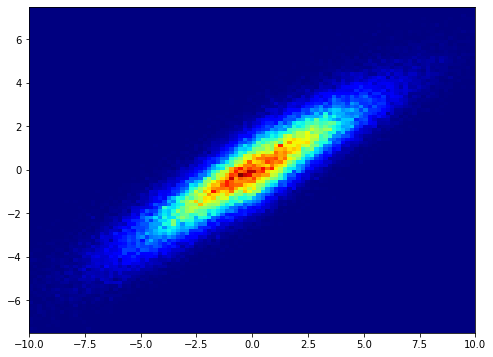

In [9]:
n_samples = 100000
sample = bg.sample(n_samples)[1]
plot_distribution(sample)

In [10]:
cov = np.dot(sample.T, sample)
print("Achieved covariance matrix:")
print(cov/n_samples)
print()
print("Wanted covariance_matrix:")
print(bivariate_normal_model.cov)

Achieved covariance matrix:
[[9.19622563 5.44667563]
 [5.44667563 3.97623531]]

Wanted covariance_matrix:
[[9.  5.4]
 [5.4 4. ]]
